## 1. Ovreview of images

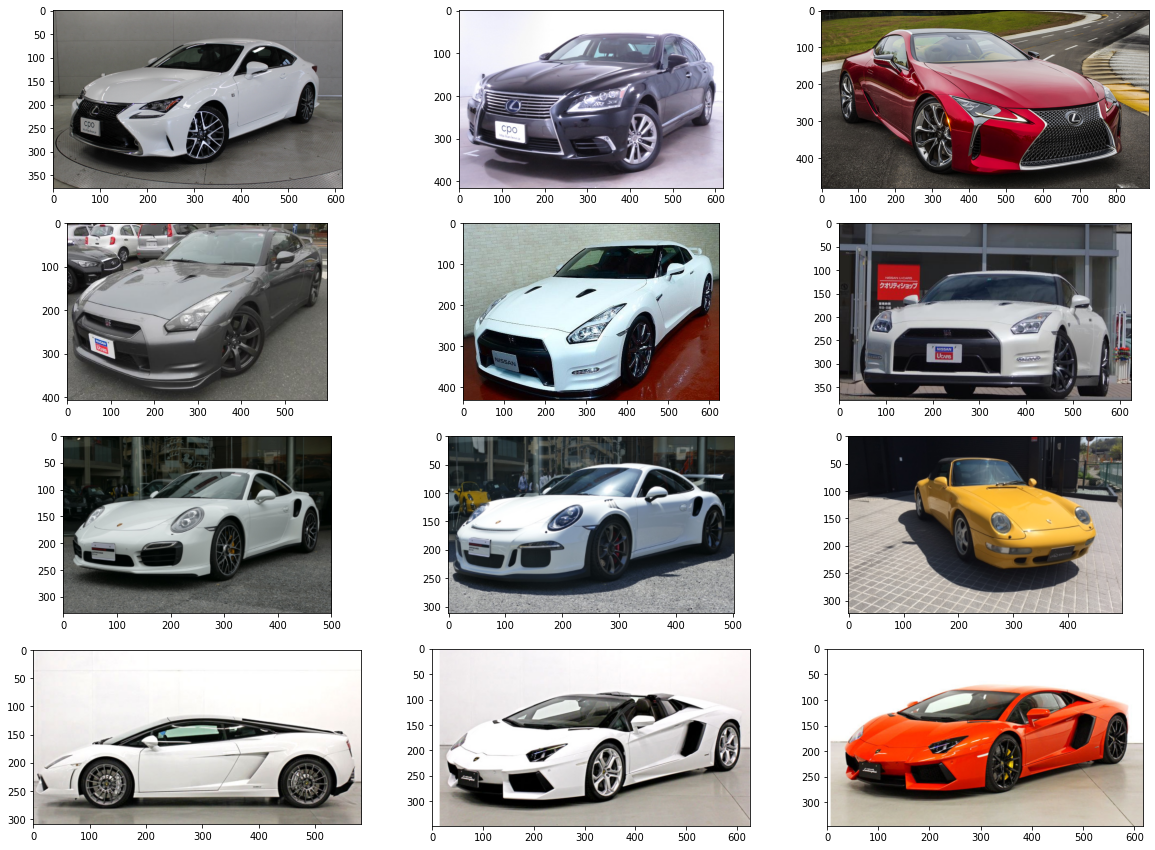

In [0]:
# Read Images
imm = []
for image in pred :   
    im= mpimg.imread(image)
    imm.append(im)
plt.figure(figsize=(20,15))

for i in range(len(imm)):
    plt.subplot(4,3, i+1)
    plt.imshow(imm[i]) 

##  2. Import library

In [0]:
import os
import h5py
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet152
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import time
import glob
import json
import csv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


## 3. Prepare dataset

In [0]:
# load training data of A
images = glob.glob('GTR/train/LEX/*')
trainA=[]
for image in images:
    trainA.append(image)
#print(trainA)

# Read A Images
trainAim = []
#from keras.preprocessing import image
for images in trainA: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainAim.append(x)
print(np.shape(trainAim))   


(100, 224, 224, 3)


In [0]:
# load training data of B
images = glob.glob('GTR/train/GTR/*')
trainB=[]
for image in images:
    trainB.append(image)

# Read B Images
trainBim = []
for images in trainB: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainBim.append(x)
print(np.shape(trainBim))   

(100, 224, 224, 3)


In [0]:
# load training data of C
images = glob.glob('GTR/train/POR/*')
trainC=[]
for image in images:
    trainC.append(image)

# Read C Images
trainCim = []
for images in trainC: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainCim.append(x)
print(np.shape(trainCim))   

(100, 224, 224, 3)


In [0]:
# load training data of D
images = glob.glob('GTR/train/LAM/*')
trainD=[]
for image in images:
    trainD.append(image)

# Read D Images
trainDim = []
for images in trainD: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    trainDim.append(x)
print(np.shape(trainDim))   


(100, 224, 224, 3)


In [0]:
# load validation data of A
images = glob.glob('GTR/validation/LEX/*')
validationA=[]
for image in images:
    validationA.append(image)

# Read A Images
validationAim = []
for images in validationA: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationAim.append(x)
print(np.shape(validationAim))   

(20, 224, 224, 3)


In [0]:
# load validation data of B
images = glob.glob('GTR/validation/GTR/*')
validationB=[]
for image in images:
    validationB.append(image)

# Read B Images
validationBim = []
for images in validationB: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationBim.append(x)
print(np.shape(validationBim))   

(20, 224, 224, 3)


In [0]:
# load validation data of C
images = glob.glob('GTR/validation/POR/*')
validationC=[]
for image in images:
    validationC.append(image)

# Read C Images
validationCim = []
for images in validationC: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationCim.append(x)
print(np.shape(validationCim))   

(20, 224, 224, 3)


In [0]:
# load validation data of D
images = glob.glob('GTR/validation/LAM/*')
validationD=[]
for image in images:
    validationD.append(image)

# Read D Images
validationDim = []
for images in validationD: 
    img = load_img(images, target_size=(224, 224))
    x = img_to_array(img)
    validationDim.append(x)
print(np.shape(validationDim))   

(20, 224, 224, 3)


In [0]:
#Create train data
X_train = np.vstack((trainAim,trainBim,trainCim,trainDim))
X_test= np.vstack((validationAim,validationBim,validationCim,validationDim))

#print(X_test[0])
print(np.shape(X_train))
print(np.shape(X_test))

X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)
#print(X_test[0])

print(np.shape(X_train))
print(np.shape(X_test))

(400, 224, 224, 3)
(80, 224, 224, 3)
(400, 224, 224, 3)
(80, 224, 224, 3)


In [0]:
#Create label data
n=4
y_train = np.hstack((np.zeros(len(X_train)//n), np.ones(len(X_train)//n), np.ones(len(X_train)//n)*2, np.ones(len(X_train)//n)*3))
y_test =  np.hstack((np.zeros(len(X_test)//n), np.ones(len(X_test)//n), np.ones(len(X_test)//n)*2, np.ones(len(X_test)//n)*3))

In [0]:
print(np.shape(y_train))
print(np.shape(y_test ))

y_test

(400,)
(80,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

## 4. Extract features by ResNet50 

In [0]:
# 3.Extract features by ResNet50 and train FC model
# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output  #4d
print(np.shape(x))
x = GlobalAveragePooling2D()(x)  #2d
print(np.shape(x))
x = Dense(64, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized, i.e. freeze all convolutional ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

#model.summary()

94773248/94765736 [==============================] - 1s 0us/step
(None, None, None, 2048)
(None, 2048)


In [0]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

t=time.time()

# train the model on the new data 
history=model.fit(X_train, y_train, validation_data=(X_test, y_test) , epochs=5, batch_size=32, shuffle=True)

t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict')

Epoch 1/5
13/13 [==============================] - 3s 207ms/step - loss: 1.2053 - accuracy: 0.4775 - val_loss: 0.8699 - val_accuracy: 0.6375
Epoch 2/5
13/13 [==============================] - 1s 104ms/step - loss: 0.5375 - accuracy: 0.8000 - val_loss: 0.6040 - val_accuracy: 0.7500
Epoch 3/5
13/13 [==============================] - 1s 104ms/step - loss: 0.3197 - accuracy: 0.8900 - val_loss: 0.4880 - val_accuracy: 0.8125
Epoch 4/5
13/13 [==============================] - 1s 104ms/step - loss: 0.2378 - accuracy: 0.9300 - val_loss: 0.4492 - val_accuracy: 0.8375
Epoch 5/5
13/13 [==============================] - 1s 104ms/step - loss: 0.1736 - accuracy: 0.9625 - val_loss: 0.4009 - val_accuracy: 0.8125
18.96371 Seconds to predict


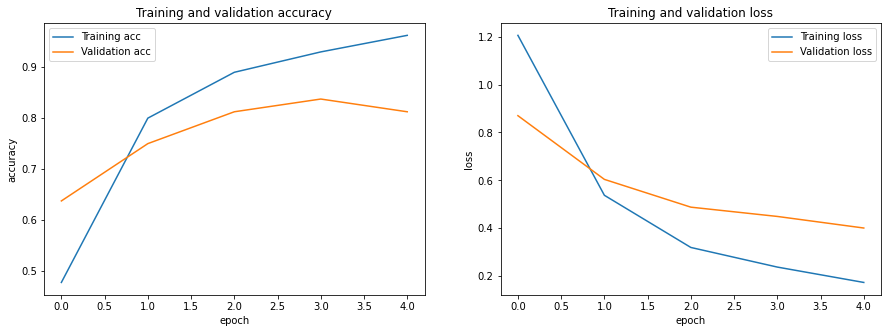

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
            
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

## 5. Obtain prediction on new images

In [0]:
# load prediction data 
images = glob.glob('GTR/predict/*')
pred=[]
for image in images:
    pred.append(image)

# Read prediction Images
prediction = []
for imm in pred: 
    img = load_img(imm, target_size=(224, 224))
    x = img_to_array(img)
    prediction.append(x)
print(np.shape(prediction))   

(12, 224, 224, 3)


In [0]:
prediction1=np.array(prediction)
prediction2 = preprocess_input(prediction1)
predictions3 = model.predict(prediction2)
print(np.argmax(predictions3, axis=1))


[0 2 0 1 3 1 2 2 2 3 3 3]


In [0]:
predictions = model.predict(X_test)
pre1=np.argmax(predictions, axis=1)
pre2=[x for i,x in enumerate(pre1) if x==y_test[i]]
print("accuracy",len(pre2)/80)

print("prediction", pre1)
print("label_data", np.array(y_test).astype(int))

accuracy 0.8125
prediction [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 3 2 1 2 2 0 1 1 1 1 1 2 1 1
 2 1 1 3 2 1 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 3]
label_data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]


In [0]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 58ms/step - loss: 0.4009 - accuracy: 0.8125


[0.4008822441101074, 0.8125]